NetFlix_Project_Sol

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df_raw = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df = df_raw.copy()

In [163]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


Basic Analysis
1. There is no null values present 
2. Release date not in date format.
3. Genre is in List format.
4. Need to convert Vote_Average into bins.
5. Removing non relavent Cols of overview, language Url

In [165]:
# Dopping Columns
df = df.drop(columns=['Overview', 'Original_Language', 'Poster_Url' ])

In [166]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [167]:
# Release date to date format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [168]:
# Extracting year from Release date
df['Release_Date'] = df['Release_Date'].dt.year

In [169]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [170]:
#Q2 Movie as the highest votes in vote avg column?
df[df['Vote_Average'] == df['Vote_Average'].max()].sort_values(by='Vote_Average' , ascending= False)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9391,2020,Kung Fu Master Huo Yuanjia,13.745,1,10.0,"Action, Drama"


In [171]:
#Q3
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"


In [172]:
#Q4 
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"
9826,1984,Threads,13.354,186,7.8,"War, Drama, Science Fiction"


In [173]:
#Q5
df['Release_Date'].value_counts()

Release_Date
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1925      1
1902      1
1920      1
1929      1
1930      1
Name: count, Length: 102, dtype: int64

Q1 converting Genre from list to explode

In [174]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,2006.203623,40.326088,1392.805536,6.439534
std,15.685554,108.873998,2611.206907,1.129759
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128500,146.000000,5.900000
50%,2011.000000,21.199000,444.000000,6.500000
75%,2017.000000,35.191500,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


In [175]:
def categorize_col(df,col, label):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels=label, duplicates='drop' )
    return df

In [176]:
label = ["Not_popular", 'Below_Average', 'Average', 'Popular']
categorize_col(df,'Vote_Average', label)
df['Vote_Average'].unique()


['Popular', 'Below_Average', 'Average', 'Not_popular', NaN]
Categories (4, object): ['Not_popular' < 'Below_Average' < 'Average' < 'Popular']

In [177]:
# need to convert Genre into list
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre',ignore_index=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [178]:
#Q1
df['Genre'].value_counts()

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

In [179]:
# This action must perfomr before explode operation
# converting Continuous data to categorical data

# desc = df['Vote_Average'].describe()
# bins = sorted(set([desc['min'], desc['25%'], desc['50%'],desc['75%'],desc['max']]))
# label = ["Not popular", 'Below Average', 'Average', 'Popular'][:len(bins)-1]
# df['Vote_Average'] = pd.cut(df['Vote_Average'], bins = bins , labels= label, duplicates='drop')
# df.head()


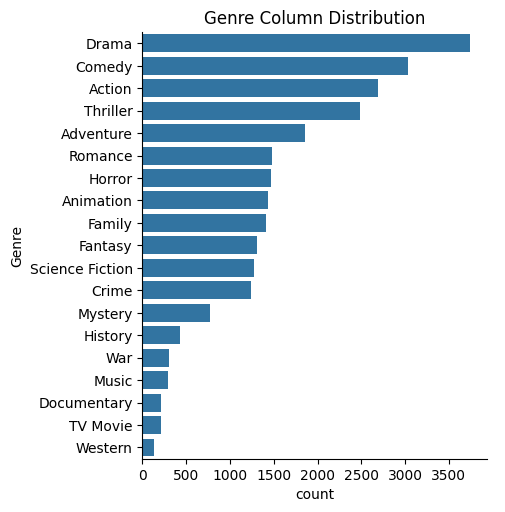

In [180]:
#Plotting using seaborn 
# Q1
sns.catplot(y = 'Genre', data=df, kind = 'count', order=df['Genre'].value_counts().index)
plt.title("Genre Column Distribution")
plt.show()

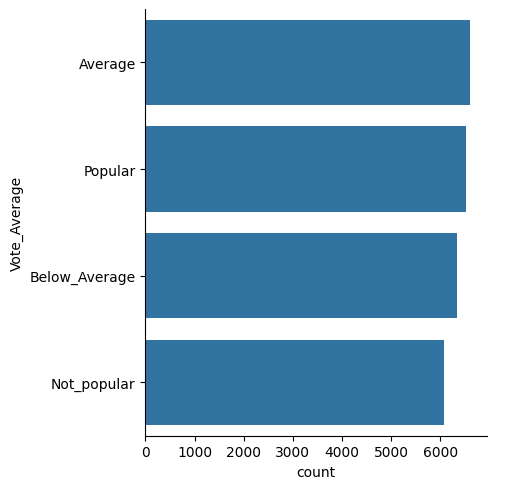

In [181]:
#Q2
sns.catplot(y= 'Vote_Average', data = df, kind='count', order = df['Vote_Average'].value_counts().index)
plt.show()

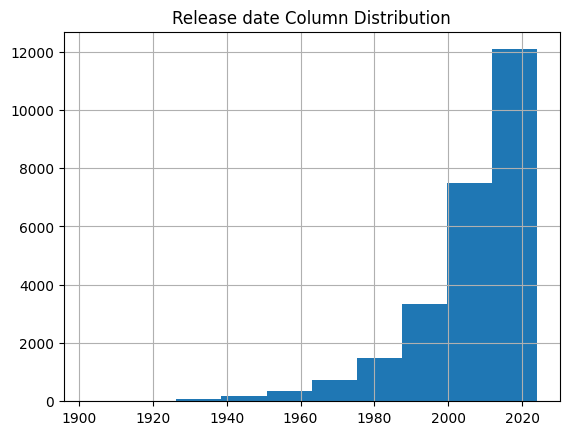

In [182]:
#Q5
df['Release_Date'].hist()
plt.title('Release date Column Distribution')
plt.show()

Conclusion

Q1. What is the most frequent genre of movies released on Netflix?
    
    Drama genre is the most frequest genre.

Q2. Which has highest votes in vote avg column?

Drama has the highest popularity

Q3. What movie got the highest popularity? what's its genre?

Spider-Man: No way Home has the highest popularity rate in our dataset and it has genre of Action, Adventure and Scince Fiction

Q4. What movie got the lowest popularity? what's its genre?

The United States, Thread has the highest lowest rate in out dataset and it has genre of music, drama, war . sci-fi, history

Q5. Which year has the most filmmed movies?

Year 2020 has the highest filming rate in out dataset
